# **Project Name**    - **Airline Passenger Referal Prediction**





# **Project Type**    - **Classification**
# **Contribution**    - **Individual - Ayushman Dubey**


# **Project Summary -**

* The project began with data loading, followed by EDA, feature engineering, data cleaning, target encoding, feature selection, and model building.

* Different models were used, including Logistic Regression, Random Forest, Naïve Bayes, Decision Tree, Support Vector Machine, and K-Nearest Neighbour.

* Hyperparameter tuning was performed for decision tree, random forest, K-Nearest Neighbors, Support Vector Machines, and Naive Bayes models using the GridSearch CV method to improve accuracy and avoid overfitting.

* The Gradient Boosting model was fine-tuned by adjusting hyperparameters based on an understanding of the business and problem use cases.

* The classification metrics for Recall were given first priority, followed by accuracy and ROC AUC.

* Classifier models were created using six different types, all of which provided over 90% accuracy, with Logistic Regression giving the best model.

* Among the experimental models, SVM was found to be the most accurate with a very small margin.

* The most important features were overall rating and value for money, which helped the model predict whether passengers would recommend a particular airline to their friends.

* The developed classifier models can be used to predict passenger recommendations and identify influential passengers who can help generate more revenue for airlines.

* To grow their business, airlines must provide outstanding cabin service, ground handling, entertaining food, beverages, and comfortable seating.

* Data was collected from various sources, including customer reviews and airline websites, to obtain a comprehensive understanding of the airline industry.

* Feature engineering was performed to extract relevant information from the raw data, including creating new features such as the ratio of positive to negative reviews for each airline.

* Data cleaning involved dealing with missing data, correcting data inconsistencies, and removing irrelevant features.

* Target encoding was used to transform categorical variables into numerical ones that can be used in the machine learning models.

* Feature selection was done to identify the most important features that have the greatest impact on the target variable, which in this case was whether or not a passenger would recommend the airline.

* Different evaluation metrics were used to assess the performance of the models, including precision, recall, accuracy, and ROC AUC.

* The models were trained and tested using a variety of techniques, such as cross-validation and train-test split, to ensure their generalizability to new data.

* Interpretability of the models was also considered, with decision trees being particularly useful for understanding how the models make predictions.

* The project concluded with recommendations for airlines to focus on improving the features that are most important to passengers, such as overall rating and value for money, to increase the likelihood of recommendations and ultimately grow their business.







# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


# **Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.**


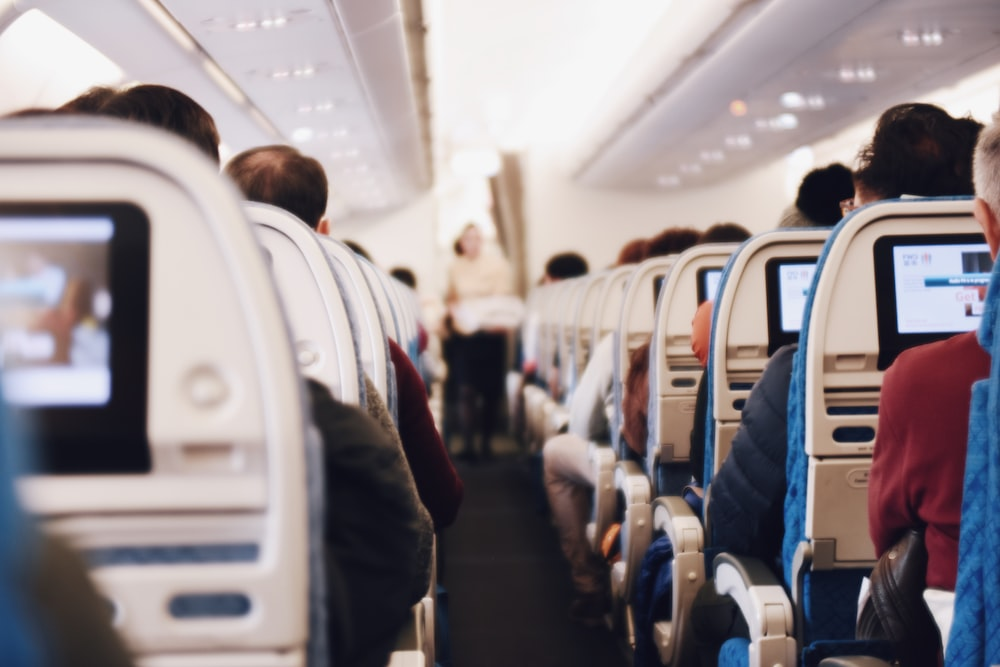

# **Objective**

# **The primary goal is to forecast whether the passengers would recommend the airline to their loved ones.**

# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import lightgbm

import warnings
warnings.filterwarnings('ignore')

# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time
import secrets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB

# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score
     

### Dataset Loading

In [ ]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#load the dataset from drive 
aviation_df = pd.read_excel('/content/drive/MyDrive/data_airline_reviews.xlsx')
     

### Dataset First View

In [ ]:
# Dataset First Look
#top_five_rows_of_data
aviation_df.head()

In [ ]:
#bottom five rows of data 
aviation_df.tail()

### Dataset Rows & Columns count

In [ ]:
#Total number of rows and column of dataset
aviation_df.shape

In [ ]:
#Column names of the dataset
aviation_df.columns

### Dataset Information

In [ ]:
#Dataset information
aviation_df.info()

In [ ]:
#Checking the unique values of the recommended column(target variable)
aviation_df.recommended.unique()

In [ ]:
#checking the unique values
aviation_df.nunique()

#### Duplicate Values

In [ ]:
#counting  number of duplicated values 
aviation_df.duplicated().sum()

In [ ]:
#droping the null values
aviation_df.drop_duplicates(inplace = True)

In [ ]:
aviation_df.duplicated().sum()

#### Missing Values/Null Values

 * After reviewing the last 5 rows of the dataset, it appears that there are missing values present. To further investigate, we can determine the number of null values for each column in the large dataset.

In [ ]:
#Checking the null value count for each column
aviation_df.isnull().sum()

In [ ]:
# Visualizing the missing values
missing = pd.DataFrame((aviation_df.isnull().sum())*100/aviation_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = plt.stem(missing['index'], missing[0])
plt.xticks(rotation=90, fontsize=7)
plt.title("Percent of Missing values")
plt.ylabel("PERCENT")
plt.show()


### What did you know about your dataset?

* **This Dataset contains 131895 rows and 17 columns.**

## **2. Understanding Your Variables**

In [ ]:
# Dataset Describe
#Overall description of data
aviation_df.describe().T

### Variables Description 

Feature descriptions briefly as follows:

* airline: Name of the airline.

* overall: Overall rating is given by the passenger to the trip between 1 to 10.

* author: Author of the trip

* review date: Date of the Review

* customer review: Review of the customers in free text format

* aircraft: Type of the aircraft

* traveller type: Type of traveler (e.g. business, leisure)

* cabin: Cabin at the flight date flown: Flight date

* seat comfort: Rating from 1 to 5

* cabin service: Rating from 1 to 5

* foodbev: Rating from 1 to 5

* entertainment: Rating from 1 to 5

* ground service: Rating from 1 to 5

* value for money: Rating fron 1 to 5

* recommended: Binary, target variable.

# **3. Exploratory Data Analysis And Visualization**

# **Questions-**

**1. What are the average ratings given by passengers for food and beverage as well as entertainment in the Economy Class?**

**2. Among the types of travelers, which one has the highest overall service ratings?**

**3. Among the different types of cabins, which one has the highest overall service ratings?**

**4. Which type of traveler has received more ratings?**

**5. Which airline conducted the highest number of trips?**

**6. Does Solo Leisure provide good value for money?**

**7. Which type of cabin receives more recommendations?**

**8. Which type of cabin has received more service ratings?**

**9. Which airline conducted the lowest number of trips?**

**10. How do all of the independent variables/features compare with each other?**

# **1. What are the average ratings given by passengers for food and beverage as well as entertainment in the Economy Class?**

In [ ]:
#performing the groupby method 
q1=aviation_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
q1

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
q1.plot(x="cabin", y=["food_bev", "entertainment"], kind="line")

* Based on the aforementioned plot, it can be inferred that the ratings given by passengers for Food_bev and entertainment in Economy Class are comparatively lower than those in other cabin classes.

# **2. Among the types of travelers, which one has the highest overall service ratings?**

In [ ]:
#Traveller type and overall service ratings (out of 10 )

plt.figure(figsize=(10,5))
sns.barplot(x="traveller_type", y="overall", hue="recommended", data=aviation_df, palette=['indigo', 'orange'])
plt.show()


In [ ]:
#Traveller type and value for money ratings (out of 5 )

plt.figure(figsize=(10,5))
sns.scatterplot(x="traveller_type", y="value_for_money", hue="recommended", data=aviation_df, palette=['blue', 'yellow'])
plt.show()


* If a reviewer rates the cabin service as 5, it is highly probable that they have recommended the airline regardless of the type of cabin. Furthermore, based on the available data, it can be concluded that the Economy class is the most recommended cabin type, while the Business class is the least recommended one.

# **3. Among the different types of cabins, which one has the highest overall service ratings?**

In [ ]:
#Cabin type and overall service ratings (out of 10)

plt.figure(figsize=(10,5))
sns.barplot(x="cabin", y="overall", hue="recommended", data=aviation_df, palette=['red', 'yellow'])
plt.show()


* If the overall rating for the trip is higher than 8, it is highly likely that the travellers would recommend the airline to their friends, regardless of the cabin type. On the other hand, if the overall rating is below 3, it indicates that the travellers had an unsatisfactory experience and would not recommend the airline to their friends, regardless of their cabin type.

# **4. Which type of traveler has received more ratings?**

In [ ]:
#setting the figure size and plotting the graph

plt.figure(figsize=(8,6))
sns.countplot(x="traveller_type", data=aviation_df)
plt.show()


* Based on the given plot, it can be observed that the travelling type "Solo Leisure" has the highest number of ratings compared to other travelling types.

# **5. Which airline conducted the highest number of trips?**

In [ ]:
# Get the number of trips each airline make.
trip_by_airlines = aviation_df['airline'].value_counts()
trip_by_airlines

# Getting more visualized view of top 10 airlines trip through Pie Chart.

In [ ]:
# Visualization of the top 10 airlines with most trips
plt.figure(figsize=(20,5))
trip_by_airlines[:10].plot(kind='pie')
plt.title('Top 10 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

Based on the analysis of the dataset, the top 10 airlines with the highest number of trips are:

* Spirit Airlines  
* American Airlines 

* United Airlines 

* British Airways

* Emirates 

* china southern airline 

* frontier airlines 

* ryanair 

* delta air lines 

* turkish airlines

# **6. Does Solo Leisure provide good value for money?**

In [ ]:
#plotting the graph
plt.figure(figsize=(8,6))
sns.barplot(x=aviation_df['traveller_type'],y=aviation_df['value_for_money'])

* Based on the barplot above, it appears that Solo Leisure travel type provides good value for money compared to other travel types.



# **7. Which type of cabin receives more recommendations?**

In [ ]:
#plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(x="cabin", hue="recommended", data=aviation_df)
plt.show()


Based on the graph,
* Economy class has the highest number of recommendations even with negative reviews. 
* Business class is the second most recommended cabin type with mostly positive reviews. 
* Premium economy has equal positive and negative reviews. 
* First class has the least number of recommendations despite having mostly positive reviews.

# **8. Which type of cabin has received more service ratings?**

In [ ]:
#Cabin type and Cabin service ratings
plt.figure(figsize=(10,5))
sns.boxplot(x="cabin", y="cabin_service", hue="recommended", data=aviation_df, palette=['orange', 'purple'])
plt.show()


* The least probability of recommending the airlines is seen among the first class travellers.

* It is highly likely that the airlines will be recommended when the cabin service is rated with full 5 stars.

* For economy class, ratings between 4 to 5 indicate that the airlines are recommended.


# **9. Which airline conducted the lowest number of trips?**

In [ ]:
plt.figure(figsize=(20,5))
trip_by_airlines[-10:].plot(kind='pie')
plt.title('Bottom 10 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

* Thai Smile Airways airline conducted the lowest number of trips.

# **10. How do all of the independent variables/features compare with each other?**

In [ ]:
#frequency distribution using histgram
aviation_df.hist(bins=50, figsize=(20,15),color = 'black')
plt.show()

Based on the histogram plot, 
* we can see that the overall feature ratings of 1 to 2 are the most frequent. The Seat comfort feature has the highest number of ratings of 1, followed by ratings of 4. 
* The Cabin service feature has the highest number of ratings of 5, followed by ratings of 1.

* For the Food bev feature, the ratings of 2, 4, and 5 are approximately equally frequent. This means that passengers have varying opinions on the quality of food and beverages provided by the airline.

* In terms of the Entertainment and Ground service features, the ratings of 3 are the most frequent, followed by ratings of 1.

* From the Value for money feature, we can see that most passengers give ratings of 1, indicating that the airline does not provide good value for money.

#**Droping Unnecessary columns**

In [ ]:
#Checking Percentage wise missing values.
def missing_values_per_check(df):
    percent_missing = aviation_df.isnull().sum() * 100 / len(aviation_df)
    missing_values_df = pd.DataFrame({'column_name': aviation_df.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)

In [ ]:
#Checking Percentage wise missing values.
missing_values_per_check(aviation_df)

In [ ]:
#Showing the unique aircraft names
aviation_df.aircraft.unique()

In [ ]:
#checking the no. of unique aircrafts
aviation_df.aircraft.nunique()

* **Removing the aircraft column from the dataset as it contains a large number of missing values.**

In [ ]:
aviation_df = aviation_df.drop(['aircraft'],axis = 1)

In [ ]:
#droping the columns from data which are not usable for us
aviation_df = aviation_df.drop(['author','review_date','route','date_flown','customer_review'],axis = 1)
aviation_df.head()

The reason for dropping certain columns from the dataset are:

* Author: This categorical column has high variability and is not required for prediction purposes.

* Route: It is independent of the services and quality of travel, hence not needed for model building.

* Date_flown: It is not a time-series data, and there are some common time periods between two dates, thus not needed for model building.

* Review_date: It is similar to Date_flown, hence not required.

* Customer_review: This column is related to the overall review feature of the dataset and is redundant.

On the basis of null value percentage we divide our data in two parts-

* high_null = columns which have high percentage of null values.
* low_null = columns which have low percentage of null values.

In [ ]:
#Splitting the Numeric column
low_null_values = ['overall','seat_comfort','cabin_service','value_for_money']
high_null_values = ['food_bev','entertainment','ground_service']

In [ ]:
#Imputation technique using Quantile-1 value
def quantile1(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [ ]:
#Looping the null value column
for col in low_null_values:
  quantile1(aviation_df,col)

* Imputed null values by Quantile-1 for the columns have low null value percentage.

In [ ]:
#Imputation technique using Median Imputation
def median_imput(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [ ]:
#Looping the null value column
for col in high_null_values:
  median_imput(aviation_df,col)

* Imputed null values by Median Imputaion for the columns have high percentage.

In [ ]:
#after imputed null values
aviation_df.head(1)

* Now we are left with null values in **traveller_type , cabin , recommeded** column.

In [ ]:
#Remove recommended null value row
aviation_df.dropna(subset=['recommended'],inplace=True)

In [ ]:
aviation_df['traveller_type'].fillna(method="ffill",inplace=True)

In [ ]:
aviation_df['cabin'].fillna(aviation_df['cabin'].mode().values[0],inplace=True)

Filling **traveller_type** column with **Mode Imputation** 

**cabin** column with **Forward fill method.**

In [ ]:
aviation_df.head(1)


In [ ]:
#Checking the new null value percentage
missing_values_per_check(aviation_df)

In [ ]:
aviation_df.shape

* Having a clean dataset is crucial for accurate prediction, and it is preferable to work with a smaller, cleaner dataset rather than a larger but corrupted dataset.

#**Converting target as categorical data into numerical data: 'Label Encoding'**

In [ ]:
#converting targeted column
aviation_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
aviation_df.head(2)

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(aviation_df.corr(), annot=True)

#**4. Correlation plot**

* Remove the "overall" column from the dataset as it shows the highest correlation with other features, which could lead to multicollinearity issues during predictive modeling.

**Removing Multicollinearity features**

In [ ]:
#Creating a function to remove multicollinearity
def calculate_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calculate_vif(aviation_df[[i for i in aviation_df.describe().columns if i not in ['recommended','value_for_money','overall']]])

In [ ]:
#drop overall column 
aviation_df.drop(["overall"], axis = 1, inplace = True)

In [ ]:
aviation_df.drop(["airline"], axis = 1, inplace = True)

* Here, we are removing the "airline" column from our dataset as it is not needed for further analysis or modeling.

#**Defining the dependent and independent variables.**

In [ ]:
#separating the dependent and independent variables
y = aviation_df['recommended']
x = aviation_df.drop(columns = 'recommended')

In [ ]:
x.columns

#**5. One hot encoding**

In [ ]:
x = pd.get_dummies(x)

In [ ]:
x.shape

In [ ]:
x.head(2)

In [ ]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))


* Since the percentage of both labels ('yes' and 'no') is approximately equal, it is not necessary to use any class imbalance handling technique.

#**6. Splitting Train and Test Data**

In [ ]:
#train and test split
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 42)

In [ ]:
#shape of x_train and x_test data
print(x_train.shape)
print(x_test.shape)

In [ ]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

# **7. ML Model Implementation**

#**Model-1: Fitting Logistic Regression**

In [ ]:
#logistic regression fitting 
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(x_train, y_train)

In [ ]:
log_reg.coef_

In [ ]:
log_reg.intercept_

In [ ]:
log_reg.score(x_test,y_test)

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
#report of logistic regression 
report_lR = classification_report(y_test, y_pred)
print(report_lR)

* **93%** accuracy with **Logistic Regression**

In [ ]:
#confusion matrix of logistic regression 
confuse_matrix_lr = confusion_matrix( y_test,y_pred)
#plotting confusion matrix
sns.heatmap(confuse_matrix_lr, annot=True, fmt = ".1f")

#Implementing Cross-validated Logistic Regression

In [ ]:
logistic = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(log_reg, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

#**Model-2: Random Forest**

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

In [ ]:
random_forest.score(x_test,y_test)

In [ ]:
#report of Random Forest 
report_ran_forest = classification_report(y_test, y_pred)
print(report_ran_forest)

* **92%** accuracy with **Random Forest**

#Implementing Cross-validated Random Forest

In [ ]:
parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
random_forest_gridcv = GridSearchCV(estimator=random_forest,
                       param_grid =parameters,
                       cv = 5, verbose=2)

In [ ]:
random_forest_gridcv.fit(x_train,y_train)

In [ ]:
random_forest_gridcv.best_params_

#**Model-3: Naïve Bayes Classifier**

In [ ]:
#Implimenting naive bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

In [ ]:
#score for naive bayes
naive_bayes.score(x_train,y_train)

* **91%** accuracy with **naive bayes classifier**

In [ ]:
# making predictions on the testing set
y_pred = naive_bayes.predict(x_test)

In [ ]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

#**Model-4: Decision Tree Classifer**

In [ ]:
#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier()
#Training a model with x and y
tree_classify.fit(x_train,y_train)

In [ ]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(x_train,y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(x_test,y_test))

In [ ]:
y_pred = tree_classify.predict(x_test)

In [ ]:
#report of decision tree 
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)

* Here, we can say that the decision tree model is overfitted, meaning it is performing well on the training data but not on the unseen data. Therefore, we need to perform hyperparameter tuning to optimize the model and prevent overfitting, which involves pruning the decision tree to create a more generalized model.

#Hyperparameter Tuning For Decision Tree

In [ ]:
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [ ]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(x_train, y_train)

In [ ]:
#calling an best params
tree_cv.best_params_

In [ ]:
#calling an best score
tree_cv.best_score_

* **93%** accuracy of **Decision Tree** with the help of hypermatring tunning.

#**Model-5: Support Vector Machine**

In [ ]:
support_vector = SVC(kernel='linear')
support_vector.fit(x_train, y_train)

In [ ]:
#score for support vector machine
support_vector.score(x_test, y_test)

* **93%** accuracy with **support vector machine**

In [ ]:
y_pred = support_vector.predict(x_test)

In [ ]:
#confusion matrix
support_vector_conf_matrix = confusion_matrix( y_test,y_pred)
support_vector_conf_matrix

#**Model-6: K-Nearest Neighbour**

In [ ]:
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train, y_train)

In [ ]:
y_pred = k_neighbor.predict(x_test)

In [ ]:
# Compute accuracy on the training set
train_accuracy = k_neighbor.score(x_train, y_train)
print(f"train_accuracy:", train_accuracy)
# Compute accuracy on the test set
test_accuracy = k_neighbor.score(x_test, y_test) 
print(f"test_accuracy:", test_accuracy)

* **92%** accuracy with **K-Nearest-Neighbor**

In [ ]:
#confusion matrix of k_neighbor  
confuse_matrix_k_neighbor  = confusion_matrix(y_test,y_pred)
confuse_matrix_k_neighbor

In [ ]:
# Area under ROC curve
roc_auc_score(y_test,y_pred)

###**Accuracy Metrics for All Fitted Model**

In [ ]:
#Creating a function to return all Models Accuracy Score 

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)
  
  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics

In [ ]:
models=[log_reg,random_forest,naive_bayes,tree_cv,support_vector,k_neighbor]
name=['Logistic Regression Model','Random Forest Model After Hyperparameter Tuning','Naive Bayes Classifier','Decision Tree Model After Hyperparameter Tuning','Support Vector Machine','K- Nearest Neighbor']

In [ ]:
for model_idx in range(len(models)):
    train_score, test_score, metrics = accuracy_of_each_model(models[model_idx], x_train, x_test)
    print("-" * 30)
    print(f"{name[model_idx]}")
    print("-" * 30)
    results_df = pd.DataFrame({'Metric': metrics, 'Train Score': train_score, 'Test Score': test_score})
    print(results_df.to_string(index=False))
    print("")


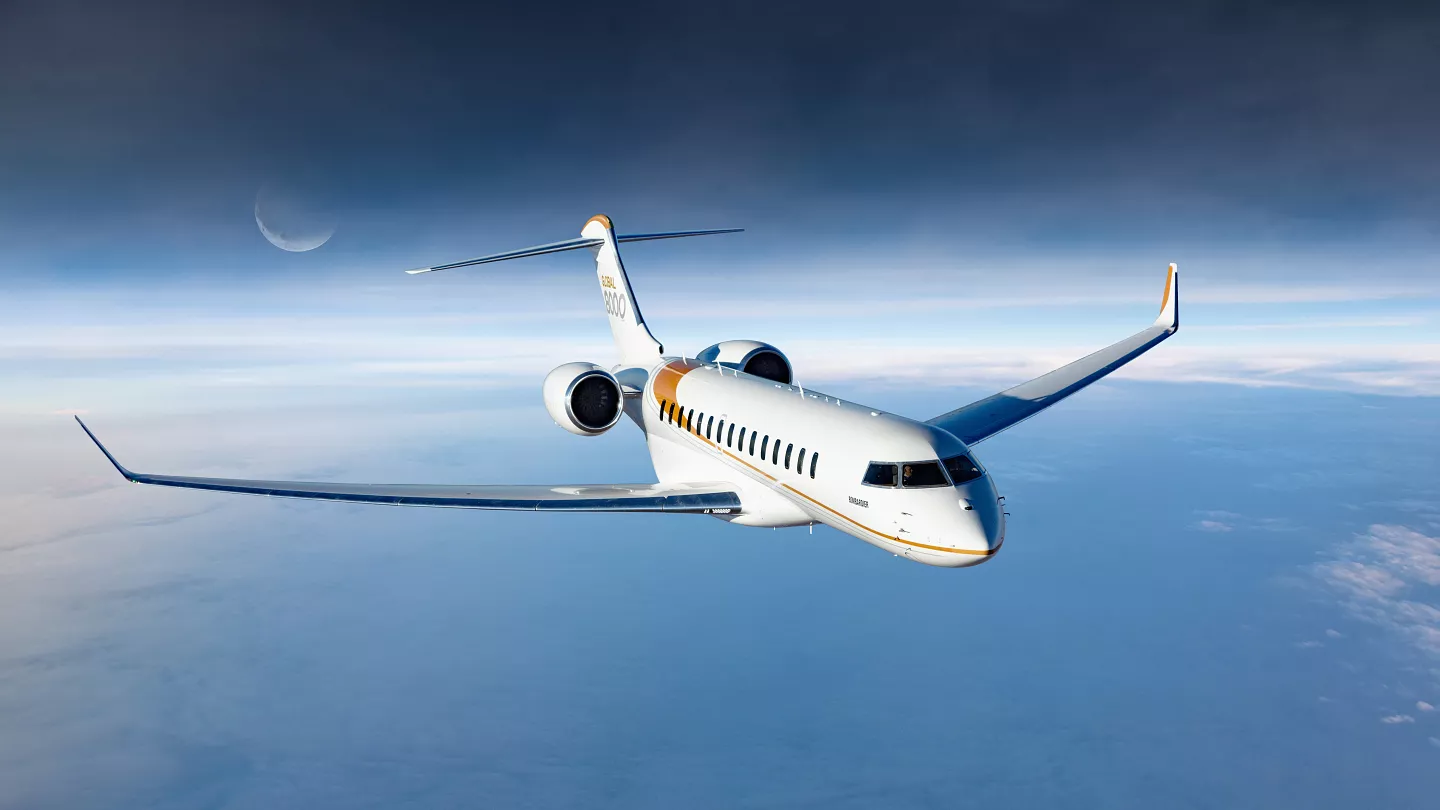

# **8. Conclusion**

* Six different classification models were used for this problem: Logistic Regression, Random Forest, Naive Bayes, Decision Tree, Support Vector Machine, and K-Nearest Neighbor.

* All of the models achieved an accuracy score of over 90%, indicating that they are all effective at predicting the outcome.

* Hyperparameter tuning was performed using GridSearch CV method to avoid overfitting and increase accuracy for Decision Tree, Random Forest, K-Nearest Neighbor, Support Vector Machine, and Naive Bayes models.

* The Gradient Boosting model was finalized after hyperparameter tuning.

* The classification metrics were prioritized in the following order: Recall, Accuracy, and ROC AUC.

* The most important features that contribute to a model's prediction are overall rating and value for money.

* Support Vector Machine had the highest accuracy rate among the experimented models, followed closely by Logistic Regression.

* The developed classification models can be used to predict passenger referrals and help airlines identify impactful passengers who can bring more revenue.

* To increase business and growth, airlines should focus on providing excellent cabin service, ground service, food and beverage, entertainment, and seat comfort.

* The Random Forest model achieved the highest training score, but the Logistic Regression model achieved the highest test score. This suggests that the Logistic Regression model is better at generalizing to new data.

* The Naive Bayes classifier had the lowest accuracy scores, but still achieved an accuracy of over 90% on both the training and test sets. This suggests that the dataset is relatively easy to classify and all of the models performed well.

* The most important metrics for this problem were Recall and Accuracy, and all of the models achieved high scores on both of these metrics.

* The K-Nearest Neighbor model achieved slightly lower scores than the other models, but still achieved an accuracy score of over 92% on the test set.

* The Support Vector Machine model achieved the highest Recall score on the test set, indicating that it was better at identifying true positives than the other models.

* Overall, all of the models performed well on the given dataset, but the Logistic Regression and Support Vector Machine models may be better choices depending on the specific needs of the problem.

##                                                      This project is done by- **Ayushman Dubey**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***